In [1]:
import pandas as pd

path = "/content/sample_data/mse.csv"
df = pd.read_csv(path)

In [2]:
df

,VWRegressor,Suggestion,Random forest
0,3.002680,454.802280,0.004835
1,2.941470,454.094270,0.005717
2,2.967722,454.404722,0.004534
3,2.919272,453.807472,0.006957
4,2.961605,454.310405,0.003125
...,...,...,...
195,12.748490,16.562648,0.488436
196,13.450875,12.935951,0.066600
197,7.539329,8.425722,0.407350
198,13.335623,17.674830,1.070100


# Friedman Test

In [4]:
vwRegressor = df['VWRegressor']
suggestion = df['Suggestion']
rf = df['Random forest']

In [5]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(vwRegressor, suggestion, rf)

In [6]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=250.870, p=0.000


In [7]:
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Different distributions (reject H0)


# Post hoc tests

In [8]:
import pandas as pd

path = "/content/sample_data/post_hoc.csv"
df = pd.read_csv(path)

In [9]:
df

,algo,mse
0,VWRegressor,3.002680
1,VWRegressor,2.941470
2,VWRegressor,2.967722
3,VWRegressor,2.919272
4,VWRegressor,2.961605
...,...,...
595,Random forest,0.488436
596,Random forest,0.066600
597,Random forest,0.407350
598,Random forest,1.070100


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
Random forest,Suggestion,12394958.3565,0.001,4612653.2668,20177263.4461,True
Random forest,VWRegressor,12409763.4485,0.001,4627458.3588,20192068.5381,True
Suggestion,VWRegressor,14805.092,0.9,-7767499.9977,7797110.1817,False


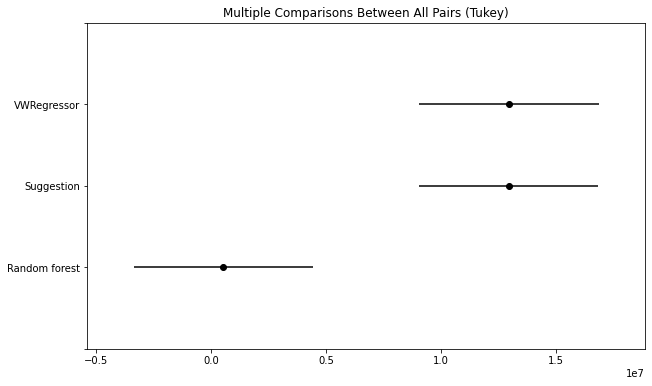

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['mse'], groups=df['algo'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()

there is no significant difference between our suggestion and the chosen algorithm. but we can see that there is a significant difference between Random Forest and the other two models.